# Table of Contents
## 1. Import Libraries and Data
## 2. Clean Data
## 3. Elbow Technique
## 4. k-Means Clustering

# 1. Import Libraries and Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
#Display graphs w/o calling
%matplotlib inline

In [3]:
#Import data
path = r"C:\Users\carol\Documents\Career Foundry\6 Advanced Analytics & Dashboard Design\A6 Project"
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike.csv'), index_col = False)

# 2. Clean Data

## Review Data

In [4]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,Pn4kpQ,16699,Sun,16,9/22/2013 16:10,72,W 52 St & 11 Ave,40.767272,-73.993929,9/22/2013 16:33,290,2 Ave & E 58 St,40.760203,-73.964785,1376,Subscriber,1986.0,2
1,FHenrJ,16837,Fri,17,9/20/2013 17:44,72,W 52 St & 11 Ave,40.767272,-73.993929,9/20/2013 17:49,385,E 55 St & 2 Ave,40.757973,-73.966033,303,Subscriber,1980.0,1
2,NAIdSB,14778,Sat,15,9/14/2013 15:52,72,W 52 St & 11 Ave,40.767272,-73.993929,9/14/2013 15:56,305,E 58 St & 3 Ave,40.760958,-73.967245,232,Subscriber,1971.0,1
3,P7EP9i,19985,Thu,19,9/19/2013 19:25,72,W 52 St & 11 Ave,40.767272,-73.993929,9/19/2013 19:38,464,E 56 St & 3 Ave,40.759345,-73.967597,795,Subscriber,1984.0,1
4,U0UCWc,19765,Mon,21,9/16/2013 21:54,72,W 52 St & 11 Ave,40.767272,-73.993929,9/16/2013 22:09,367,E 53 St & Lexington Ave,40.758281,-73.970694,891,Subscriber,1980.0,1


In [5]:
df.shape

(50000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  50000 non-null  object 
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

Missing values in birth_year column correspond to non-subscribers.

## Convert Weekdays to Numbers

In [7]:
df['weekday'].value_counts(dropna = False)

Mon    7715
Sun    7319
Fri    7309
Wed    7228
Tue    7065
Thu    6857
Sat    6507
Name: weekday, dtype: int64

In [8]:
#Create list of number values for days of week
day = []

for value in df['weekday']:
    if value == 'Sun':
        x = 0
        day.append(x)
    if value == 'Mon':
        x = 1
        day.append(x)
    if value == 'Tue':
        x = 2
        day.append(x)
    if value == 'Wed':
        x = 3
        day.append(x)
    if value == 'Thu':
        x = 4
        day.append(x)
    if value == 'Fri':
        x = 5
        day.append(x)
    if value == 'Sat':
        x = 6
        day.append(x)

In [9]:
#Check results
day

[0,
 5,
 6,
 4,
 1,
 1,
 5,
 4,
 3,
 0,
 2,
 4,
 5,
 1,
 5,
 3,
 6,
 0,
 3,
 0,
 1,
 5,
 4,
 5,
 2,
 3,
 1,
 5,
 5,
 2,
 0,
 2,
 6,
 4,
 4,
 5,
 2,
 2,
 5,
 5,
 6,
 0,
 5,
 5,
 0,
 1,
 2,
 5,
 6,
 3,
 2,
 5,
 0,
 1,
 6,
 4,
 0,
 4,
 1,
 3,
 0,
 0,
 4,
 3,
 1,
 5,
 0,
 6,
 2,
 5,
 0,
 6,
 4,
 5,
 0,
 6,
 0,
 4,
 1,
 1,
 6,
 1,
 0,
 6,
 3,
 2,
 6,
 4,
 2,
 6,
 6,
 0,
 3,
 1,
 5,
 4,
 1,
 5,
 1,
 3,
 5,
 0,
 4,
 5,
 5,
 0,
 5,
 6,
 6,
 5,
 4,
 0,
 5,
 6,
 0,
 5,
 5,
 1,
 3,
 2,
 4,
 4,
 2,
 6,
 6,
 4,
 4,
 3,
 5,
 3,
 1,
 6,
 1,
 2,
 0,
 3,
 5,
 2,
 6,
 6,
 6,
 1,
 3,
 1,
 2,
 4,
 1,
 5,
 3,
 5,
 3,
 0,
 0,
 1,
 3,
 3,
 1,
 4,
 6,
 0,
 0,
 2,
 3,
 1,
 6,
 0,
 2,
 5,
 3,
 3,
 5,
 3,
 1,
 4,
 1,
 4,
 1,
 0,
 1,
 4,
 1,
 4,
 4,
 3,
 5,
 5,
 3,
 6,
 4,
 3,
 5,
 5,
 5,
 3,
 3,
 2,
 2,
 3,
 5,
 6,
 2,
 2,
 5,
 4,
 0,
 5,
 6,
 0,
 3,
 4,
 5,
 4,
 4,
 6,
 3,
 2,
 0,
 1,
 2,
 0,
 3,
 4,
 4,
 4,
 6,
 4,
 3,
 6,
 5,
 6,
 1,
 6,
 2,
 4,
 4,
 5,
 2,
 2,
 2,
 3,
 5,
 5,
 6,
 0,
 6,
 2,
 1,
 2,
 4,
 4,


In [10]:
#Add day list to dataframe
df['day'] = day

In [11]:
#Check results
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,day
0,Pn4kpQ,16699,Sun,16,9/22/2013 16:10,72,W 52 St & 11 Ave,40.767272,-73.993929,9/22/2013 16:33,290,2 Ave & E 58 St,40.760203,-73.964785,1376,Subscriber,1986.0,2,0
1,FHenrJ,16837,Fri,17,9/20/2013 17:44,72,W 52 St & 11 Ave,40.767272,-73.993929,9/20/2013 17:49,385,E 55 St & 2 Ave,40.757973,-73.966033,303,Subscriber,1980.0,1,5
2,NAIdSB,14778,Sat,15,9/14/2013 15:52,72,W 52 St & 11 Ave,40.767272,-73.993929,9/14/2013 15:56,305,E 58 St & 3 Ave,40.760958,-73.967245,232,Subscriber,1971.0,1,6
3,P7EP9i,19985,Thu,19,9/19/2013 19:25,72,W 52 St & 11 Ave,40.767272,-73.993929,9/19/2013 19:38,464,E 56 St & 3 Ave,40.759345,-73.967597,795,Subscriber,1984.0,1,4
4,U0UCWc,19765,Mon,21,9/16/2013 21:54,72,W 52 St & 11 Ave,40.767272,-73.993929,9/16/2013 22:09,367,E 53 St & Lexington Ave,40.758281,-73.970694,891,Subscriber,1980.0,1,1


## Remove Unnecessary Columns

In [12]:
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'day'],
      dtype='object')

In [13]:
#Create subset w/o unnecessary columns
df_km = df.drop(['trip_id', 'bike_id', 'weekday', 'start_time', 'start_station_name', 'start_station_latitude', 
                  'start_station_longitude', 'end_time', 'end_station_name', 'end_station_latitude', 'end_station_longitude',
                'subscriber', 'birth_year', 'gender'], axis=1)

In [14]:
#Check results
df_km.head()

,start_hour,start_station_id,end_station_id,trip_duration,day
0,16,72,290,1376,0
1,17,72,385,303,5
2,15,72,305,232,6
3,19,72,464,795,4
4,21,72,367,891,1


## Clean Data

In [15]:
#Check for missing values
df_km.isnull().sum()

start_hour          0
start_station_id    0
end_station_id      0
trip_duration       0
day                 0
dtype: int64

In [16]:
#Check for duplicates
dups = df_km.duplicated()
dups.shape

(50000,)

In [17]:
#Check for mixed types
for col in df_km.columns.tolist():
  weird = (df_km[[col]].applymap(type) != df_km[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_km[weird]) > 0:
    print (col)

No missing values, duplicates, or mixed type columns.

# 3. Elbow Technique

In [18]:
#Define range of potential clusters and k-means clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [19]:
#Create score to judge cluster options
score = [kmeans[i].fit(df_km).score(df_km) for i in range(len(kmeans))] 
score

C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\lib\site-packages\sklearn\clust

[-29140182116.850876,
 -17844160921.989594,
 -12937887576.218433,
 -8412169919.52264,
 -5958038808.868605,
 -4952169374.181301,
 -4341534153.924549,
 -3871673446.0144987,
 -3426239289.3294067]

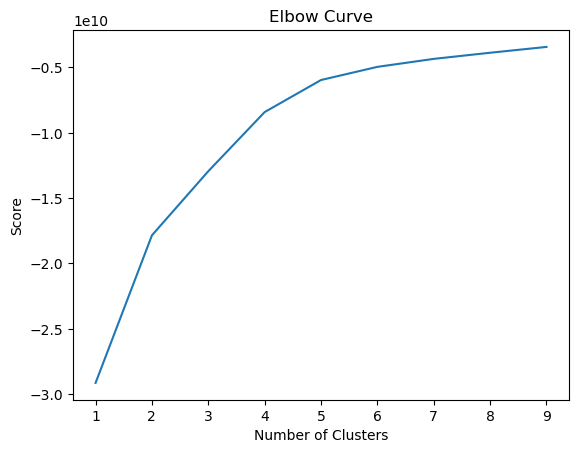

In [20]:
#Plot elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I'm going to use 5 clusters. There are clear changes in the graph up to 5, but after 5 it really smoothes out. There is a small jump from 5 to 6 but I don't think it's big enought to warrant 6 clusters instead of 5

# 4. K-Means Clustering

In [21]:
#Create kmeans object
kmeans = KMeans(n_clusters = 5) 

In [22]:
#Fit k-means to df
kmeans.fit(df_km)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [23]:
#Add cluster assignments to dataframe
df_km['clusters'] = kmeans.fit_predict(df_km)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
#Check results
df_km.head()

,start_hour,start_station_id,end_station_id,trip_duration,day,clusters
0,16,72,290,1376,0,1
1,17,72,385,303,5,0
2,15,72,305,232,6,0
3,19,72,464,795,4,0
4,21,72,367,891,1,1


In [25]:
df_km['clusters'].value_counts()

0    27739
1    14315
2     4544
4     1813
3     1589
Name: clusters, dtype: int64

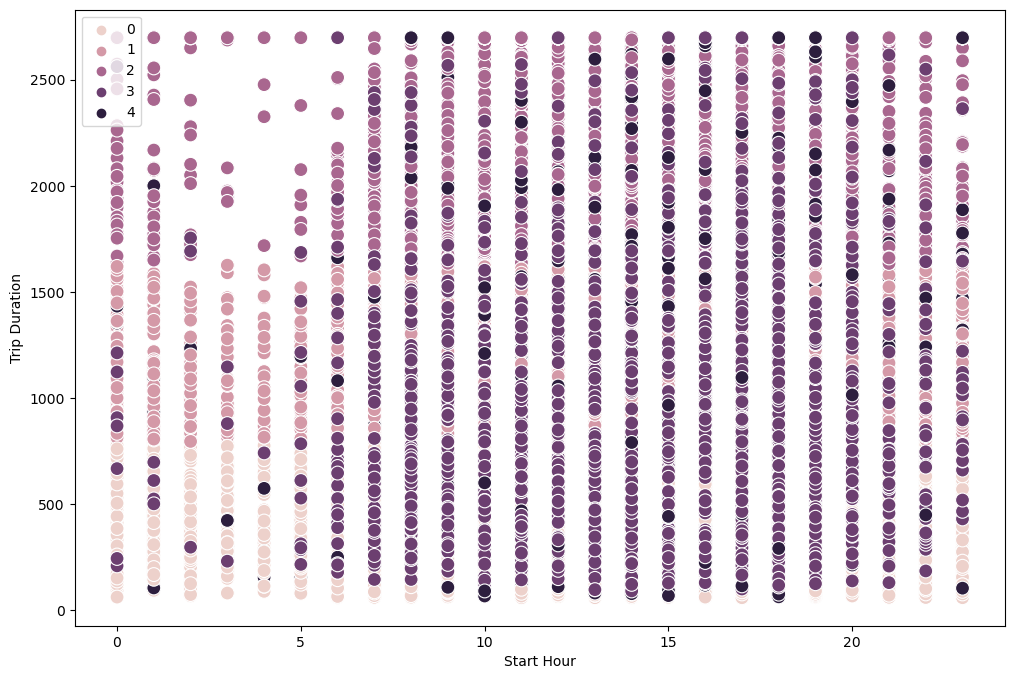

In [26]:
# Plot start_hour against trip_duration
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_km['start_hour'], y=df_km['trip_duration'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')
plt.show()

Based on this scatter plot, group 0 represents short trips and are spread throughout the day, group 1 represents longer trips spread throughout the day, and group 2 represents trips of any duration but during regular hours, i.e. not late at night/early morning.

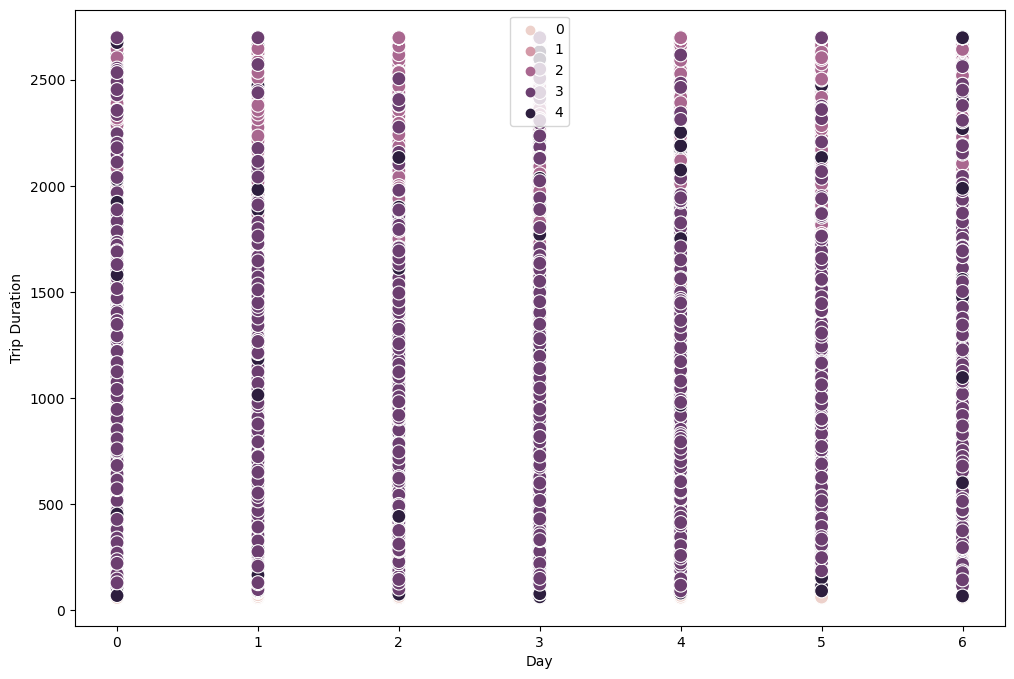

In [27]:
# Plot day against trip_duration
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_km['day'], y=df_km['trip_duration'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Day')
plt.ylabel('Trip Duration')
plt.show()

Similar to the previous chart, group 0 represents short trips, group 1 represents long trips, and group 2 represents trips of any length. All 3 groups appear to be evenly distributed across days. 

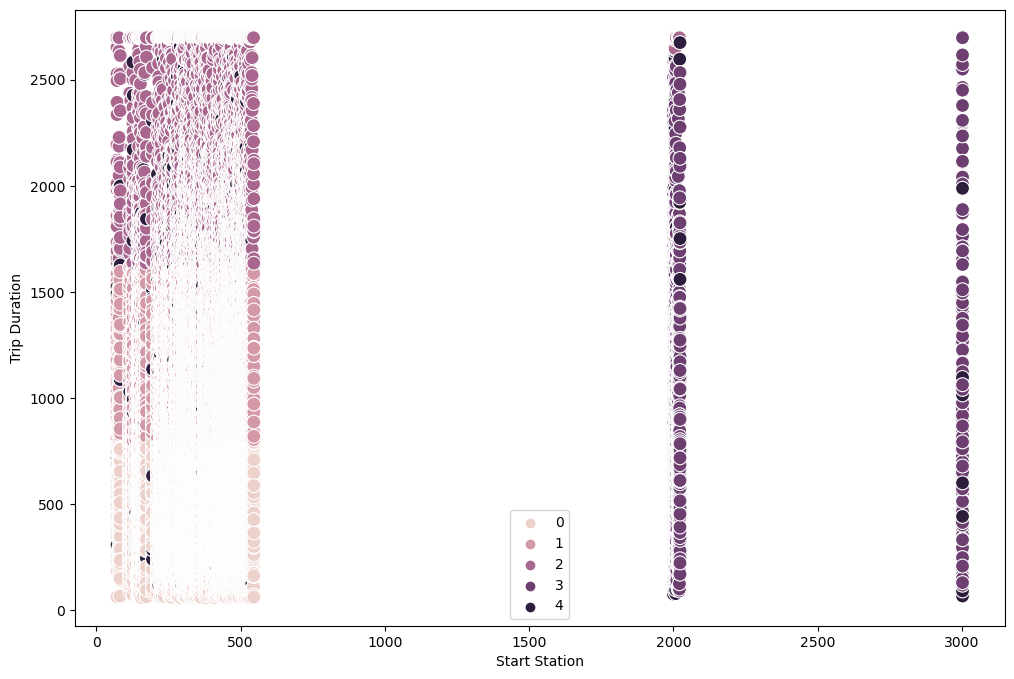

In [28]:
# Plot start_hour against trip_duration
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_km['start_station_id'], y=df_km['trip_duration'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Start Station')
plt.ylabel('Trip Duration')
plt.show()

Based on this visual, group 2 seems to be focused specifically on stations with large ID numbers, whereas groups 0 and 1 represent stations with small ID numbers.

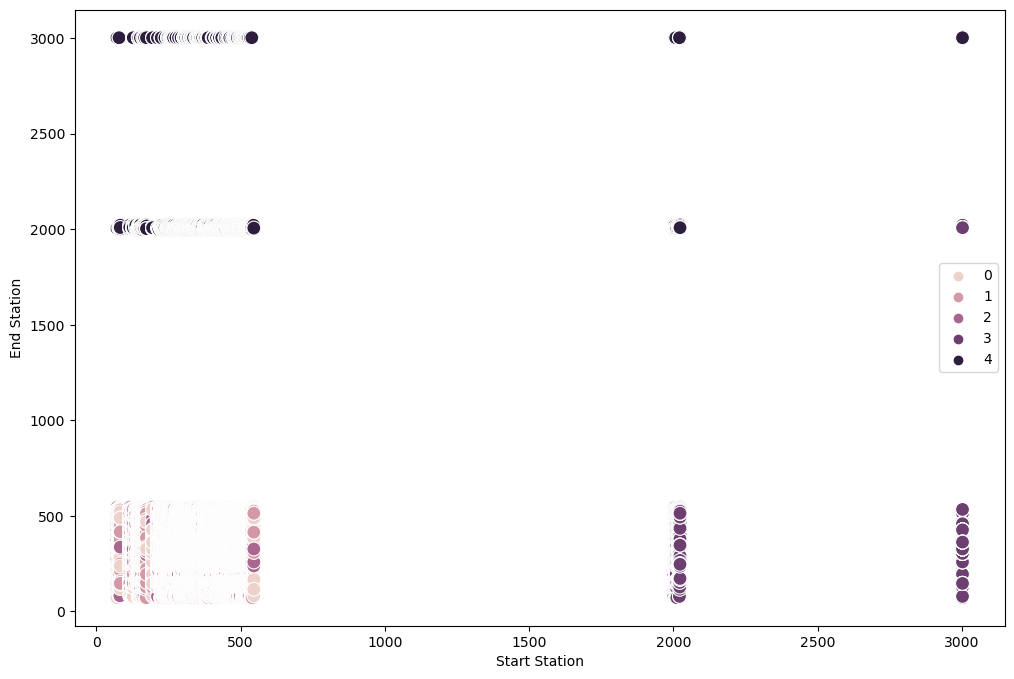

In [29]:
# Plot start_hour against trip_duration
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_km['start_station_id'], y=df_km['end_station_id'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Start Station')
plt.ylabel('End Station')
plt.show()

Overall these clusters don't make much sense to me. I think they've been skewed by the handful of station IDs that are large numbers, however I can't remove those values. 

In [30]:
df_km.loc[df_km['clusters'] == 2, 'cluster'] = 'dark purple'
df_km.loc[df_km['clusters'] == 1, 'cluster'] = 'purple'
df_km.loc[df_km['clusters'] == 0, 'cluster'] = 'pink'

In [31]:
df_km.groupby('cluster').agg({'start_hour':['mean', 'median'], 
                         'start_station_id':['mean', 'median'], 
                         'end_station_id':['mean', 'median'],
                          'trip_duration':['mean', 'median'],
                          'day':['mean', 'median']})

start_hour        start_station_id        end_station_id         \
                  mean median             mean median           mean median   
cluster                                                                       
dark purple  14.452465   15.0       399.165933  395.0     373.395687  387.0   
pink         13.973431   15.0       378.792530  393.0     379.432784  394.0   
purple       14.365630   15.0       379.080545  397.0     376.915194  390.0   

            trip_duration               day         
                     mean  median      mean median  
cluster                                             
dark purple   2127.741417  2022.5  2.873019    3.0  
pink           460.170554   456.0  2.950395    3.0  
purple        1128.759483  1092.0  2.922389    3.0

Based on these results, I don't think start_hour or day had an impact on the clusters because there is very minimal variation between the descriptive statistics for all 3 groups. As observed in the visualizations, dark purple correlates to start stations with a high ID, and the pink and purple groups represent groups with short and long trip durations, respectively. Based on these results I think the next step would be to use k-means to explore customer data like birth year and gender, but unfortunately this is information we only have on subscribers and not non-subscribers.

In [32]:
df_km.head()

,start_hour,start_station_id,end_station_id,trip_duration,day,clusters,cluster
0,16,72,290,1376,0,1,purple
1,17,72,385,303,5,0,pink
2,15,72,305,232,6,0,pink
3,19,72,464,795,4,0,pink
4,21,72,367,891,1,1,purple
